In [1]:
#Importing lib for data pre-processing and algorithm building 

get_ipython().system('pip install decision-tree-id3')
import matplotlib.pyplot as plt
import pandas as pd  # for reading data set

import six
import sys
sys.modules['sklearn.externals.six'] = six

from id3 import Id3Estimator



In [2]:
#Reading tennis data set

tennis_data = pd.read_csv('PlayTennis.csv')

#showing first 5 records

tennis_data.head(5)

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [3]:
#converting data to numerics 
# we have diffrent approches to convert to numeric values 
#labelencodeer is one of the most used technique 
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

# converting each column 
tennis_data['Outlook'] = Le.fit_transform(tennis_data['Outlook'])
tennis_data['Temperature'] = Le.fit_transform(tennis_data['Temperature'])
tennis_data['Humidity'] = Le.fit_transform(tennis_data['Humidity'])
tennis_data['Wind'] = Le.fit_transform(tennis_data['Wind'])
tennis_data['Play Tennis'] = Le.fit_transform(tennis_data['Play Tennis'])

In [4]:
#seprating target and features 

y = tennis_data['Play Tennis']
x = tennis_data.drop(['Play Tennis'],axis=1)


In [5]:
x

,Outlook,Temperature,Humidity,Wind
0,2,1,0,1
1,2,1,0,0
2,0,1,0,1
3,1,2,0,1
4,1,0,1,1
5,1,0,1,0
6,0,0,1,0
7,2,2,0,1
8,2,0,1,1
9,1,2,1,1


In [6]:
y


0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
14    1
Name: Play Tennis, dtype: int64

In [7]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.9, random_state = 0)

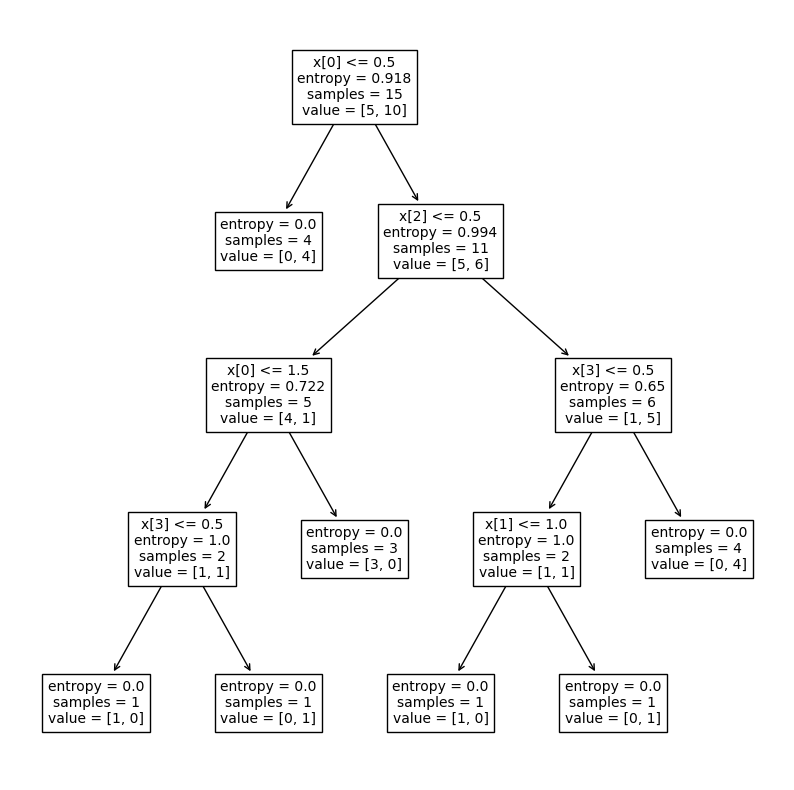

In [8]:
# Fitting the model
from sklearn import tree
#print(tree.export_text(clf))
clf = tree.DecisionTreeClassifier(criterion = 'entropy')
clf = clf.fit(x_train, y_train)
clf.fit(x,y)
fig,ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(clf, fontsize=10)
plt.show()

In [9]:
#predections 
x_pred = clf.predict(x_test)


In [11]:
conda list id3


# packages in environment at /home/pllab/anaconda3:
#
# Name                    Version                   Build  Channel
decision-tree-id3         0.1.2                    pypi_0    pypi

Note: you may need to restart the kernel to use updated packages.


In [12]:
conda list id3


# packages in environment at /home/pllab/anaconda3:
#
# Name                    Version                   Build  Channel
decision-tree-id3         0.1.2                    pypi_0    pypi

Note: you may need to restart the kernel to use updated packages.


In [13]:
conda install numpy=1.19


Solving environment: unsuccessful initial attempt using frozen solve. Retrying with flexible solve.
Solving environment: unsuccessful initial attempt using frozen solve. Retrying with flexible solve.
Solving environment: \ ^C
failed

CondaError: KeyboardInterrupt


Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install numpy==1.19


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 20.7 MB/s eta 0:00:00m eta 0:00:010:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... error
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [26 lines of output]
      Running from numpy source directory.
      <string>:460: UserWarning: Unrecognized setuptools command, proceeding with generating Cython sources and expanding templates
      Traceback (most recent call last):
        File "/home/pllab/anaconda3/lib/python3.11/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 353, in <module>
          main()
        File "/home/pllab/anaconda3/lib/python3.11/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 335, in main
          json_out['return_val'] = hook(**hook_input['kwargs'])
                                 

usage: conda [-h] [--no-plugins] [-V] COMMAND ...
conda: error: argument COMMAND: invalid choice: 'activate' (choose from 'clean', 'compare', 'config', 'create', 'info', 'init', 'install', 'list', 'notices', 'package', 'remove', 'uninstall', 'rename', 'run', 'search', 'update', 'upgrade', 'build', 'content-trust', 'convert', 'debug', 'develop', 'doctor', 'index', 'inspect', 'metapackage', 'render', 'skeleton', 'pack', 'repo', 'token', 'verify', 'server', 'env')

Note: you may need to restart the kernel to use updated packages.


In [20]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree classifier
estimator = DecisionTreeClassifier()

# Train the model
estimator.fit(x_train, y_train)

# Make predictions
x_pred = estimator.predict(x_test)

# Print classification report
print(classification_report(y_test, x_pred))



              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.64      1.00      0.78         9

    accuracy                           0.64        14
   macro avg       0.32      0.50      0.39        14
weighted avg       0.41      0.64      0.50        14



/home/pllab/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pllab/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pllab/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
#metrics library 
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, x_pred))


0.6428571428571429
